In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the new data
df = pd.read_excel('/content/ecommerce_price_predictor_combined_with_sales_discounted.xlsx')
print("Data Preview:")
print(df.head())


Data Preview:
      Product Name    Category  Price (USD)  Rating Stock Availability  \
0  Sony WH-1000XM5  Headphones       112.85     3.7           In Stock   
1  Sony WH-1000XM5  Headphones       112.85     3.7           In Stock   
2  Sony WH-1000XM5  Headphones       112.85     3.7           In Stock   
3  Sony WH-1000XM5  Headphones       112.85     3.7           In Stock   
4  Sony WH-1000XM5  Headphones       112.85     3.7           In Stock   

   Discount (%)   Brand  Reviews Count  Shipping Time (days) Return Policy  \
0            12  Adidas           2745                     8    No returns   
1            12  Adidas           2745                     8    No returns   
2            12  Adidas           2745                     8    No returns   
3            12  Adidas           2745                     8    No returns   
4            12  Adidas           2745                     8    No returns   

   ...  Competitor Price Difference (%) Profit Margin (%)  \
0  ...     

# Data cleaning and Pre-processing


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Product Name                       0
Category                           0
Price (USD)                        0
Rating                             0
Stock Availability                 0
Discount (%)                       0
Brand                              0
Reviews Count                      0
Shipping Time (days)               0
Return Policy                      0
Demand Index                       0
Seasonality Impact                 0
Competitor Price Difference (%)    0
Profit Margin (%)                  0
Customer Satisfaction (%)          0
Supply Chain Efficiency (%)        0
Competitor Name                    0
Competitor Price (USD)             0
Competitor Rating                  0
Competitor Stock Availability      0
Sales (Units Sold)                 0
Discounted Price (USD)             0
dtype: int64


In [ ]:
df[df.isnull().any(axis=1)]

,Product Name,Category,Price (USD),Rating,Stock Availability,Discount (%),Brand,Reviews Count,Shipping Time (days),Return Policy,...,Competitor Price Difference (%),Profit Margin (%),Customer Satisfaction (%),Supply Chain Efficiency (%),Competitor Name,Competitor Price (USD),Competitor Rating,Competitor Stock Availability,Sales (Units Sold),Discounted Price (USD)


In [ ]:
df.shape

(39424, 22)

In [ ]:
df.columns

Index(['Product Name', 'Category', 'Price (USD)', 'Rating',
       'Stock Availability', 'Discount (%)', 'Brand', 'Reviews Count',
       'Shipping Time (days)', 'Return Policy', 'Demand Index',
       'Seasonality Impact', 'Competitor Price Difference (%)',
       'Profit Margin (%)', 'Customer Satisfaction (%)',
       'Supply Chain Efficiency (%)', 'Competitor Name',
       'Competitor Price (USD)', 'Competitor Rating',
       'Competitor Stock Availability', 'Sales (Units Sold)',
       'Discounted Price (USD)'],
      dtype='object')

In [ ]:
df.dropna()

,Product Name,Category,Price (USD),Rating,Stock Availability,Discount (%),Brand,Reviews Count,Shipping Time (days),Return Policy,...,Competitor Price Difference (%),Profit Margin (%),Customer Satisfaction (%),Supply Chain Efficiency (%),Competitor Name,Competitor Price (USD),Competitor Rating,Competitor Stock Availability,Sales (Units Sold),Discounted Price (USD)
0,Sony WH-1000XM5,Headphones,112.85,3.7,In Stock,12,Adidas,2745,8,No returns,...,-0.50,36.59,74,93,Newegg,113.42,3.4,In Stock,4010,99.3080
1,Sony WH-1000XM5,Headphones,112.85,3.7,In Stock,12,Adidas,2745,8,No returns,...,-0.50,36.59,74,93,Bose Store,1228.90,4.1,Out of Stock,1465,99.3080
2,Sony WH-1000XM5,Headphones,112.85,3.7,In Stock,12,Adidas,2745,8,No returns,...,-0.50,36.59,74,93,Amazon,147.94,3.5,In Stock,119,99.3080
3,Sony WH-1000XM5,Headphones,112.85,3.7,In Stock,12,Adidas,2745,8,No returns,...,-0.50,36.59,74,93,Adidas Store,2142.34,3.9,In Stock,3813,99.3080
4,Sony WH-1000XM5,Headphones,112.85,3.7,In Stock,12,Adidas,2745,8,No returns,...,-0.50,36.59,74,93,Apple Store,1608.89,4.3,Out of Stock,1436,99.3080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39419,Philips Prestige Hair Straightener,Beauty,996.38,4.7,In Stock,24,Dyson,802,5,No returns,...,4.68,25.51,94,77,Walmart,1028.71,4.3,Out of Stock,60,757.2488
39420,Philips Prestige Hair Straightener,Beauty,996.38,4.7,In Stock,24,Dyson,802,5,No returns,...,4.68,25.51,94,77,Apple Store,112.02,4.5,Out of Stock,702,757.2488
39421,Philips Prestige Hair Straightener,Beauty,996.38,4.7,In Stock,24,Dyson,802,5,No returns,...,4.68,25.51,94,77,BestBuy,852.08,4.1,Out of Stock,537,757.2488
39422,Philips Prestige Hair Straightener,Beauty,996.38,4.7,In Stock,24,Dyson,802,5,No returns,...,4.68,25.51,94,77,Newegg,1835.96,5.2,In Stock,1459,757.2488


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.count()

,0
Product Name,39424
Category,39424
Price (USD),39424
Rating,39424
Stock Availability,39424
Discount (%),39424
Brand,39424
Reviews Count,39424
Shipping Time (days),39424
Return Policy,39424


In [ ]:
numerical_df = df._get_numeric_data()
numerical_df

,Price (USD),Rating,Discount (%),Reviews Count,Shipping Time (days),Demand Index,Competitor Price Difference (%),Profit Margin (%),Customer Satisfaction (%),Supply Chain Efficiency (%),Competitor Price (USD),Competitor Rating,Sales (Units Sold),Discounted Price (USD)
0,112.85,3.7,12,2745,8,45,-0.50,36.59,74,93,113.42,3.4,4010,99.3080
1,112.85,3.7,12,2745,8,45,-0.50,36.59,74,93,1228.90,4.1,1465,99.3080
2,112.85,3.7,12,2745,8,45,-0.50,36.59,74,93,147.94,3.5,119,99.3080
3,112.85,3.7,12,2745,8,45,-0.50,36.59,74,93,2142.34,3.9,3813,99.3080
4,112.85,3.7,12,2745,8,45,-0.50,36.59,74,93,1608.89,4.3,1436,99.3080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39419,996.38,4.7,24,802,5,2,4.68,25.51,94,77,1028.71,4.3,60,757.2488
39420,996.38,4.7,24,802,5,2,4.68,25.51,94,77,112.02,4.5,702,757.2488
39421,996.38,4.7,24,802,5,2,4.68,25.51,94,77,852.08,4.1,537,757.2488
39422,996.38,4.7,24,802,5,2,4.68,25.51,94,77,1835.96,5.2,1459,757.2488


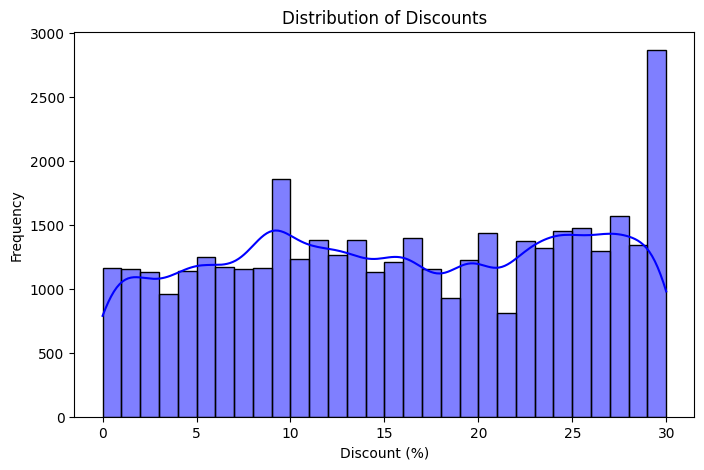

In [ ]:
# UnivariateAnalysis: Distribution of Discounts
plt.figure(figsize=(8, 5))
sns.histplot(df["Discount (%)"], bins=30, kde=True, color="blue")
plt.title("Distribution of Discounts")
plt.xlabel("Discount (%)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-12-c29ce3f78cb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Category"], order=df["Category"].value_counts().index, palette="viridis")


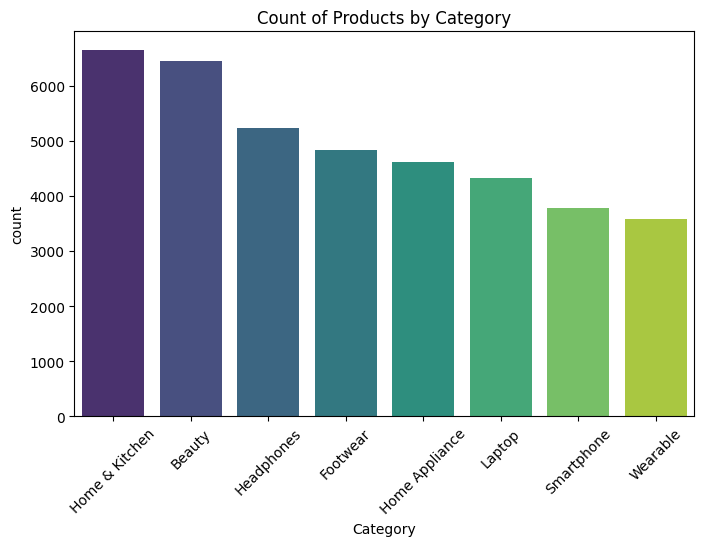

In [ ]:
# Univariate: Count of Products by Category
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Category"], order=df["Category"].value_counts().index, palette="viridis")
plt.title("Count of Products by Category")
plt.xticks(rotation=45)
plt.show()

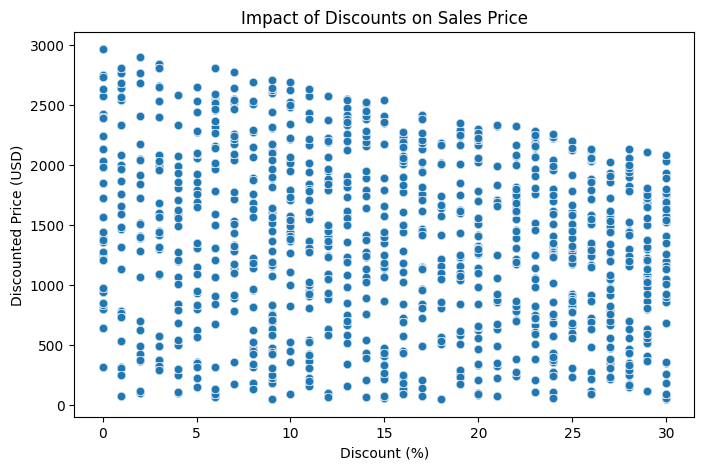

In [ ]:
# Bivariate: Relationship Between Discount & Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount (%)"], y=df["Discounted Price (USD)"], alpha=0.5)
plt.title("Impact of Discounts on Sales Price")
plt.xlabel("Discount (%)")
plt.ylabel("Discounted Price (USD)")
plt.show()

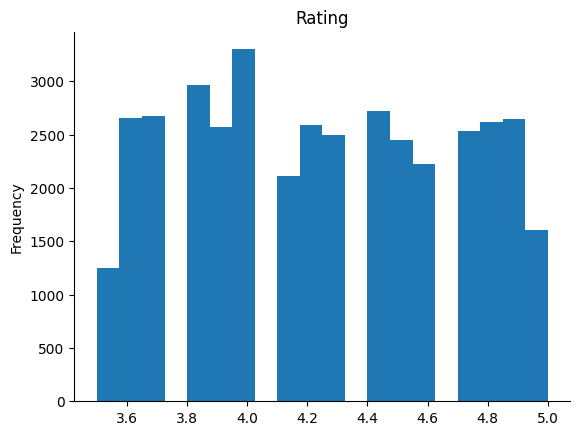

In [ ]:
# @title Ratings
numerical_df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

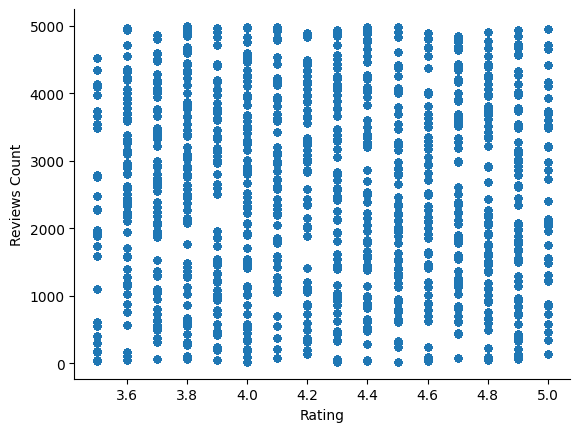

In [ ]:
# @title Ratings vs Reviews=]
numerical_df.plot(kind='scatter', x='Rating', y='Reviews Count', s=20, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

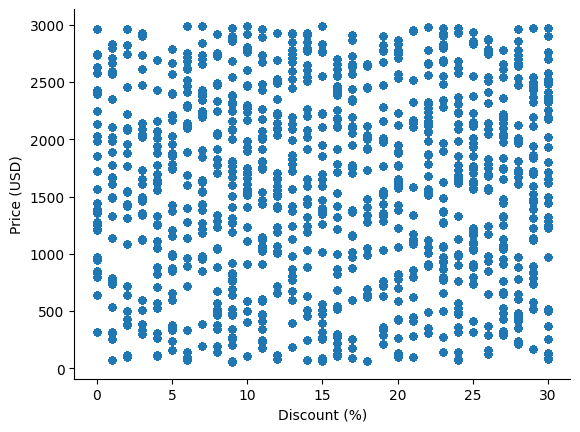

In [ ]:
# @title Discount (%) vs Original_Price

from matplotlib import pyplot as plt
numerical_df.plot(kind='scatter', x='Discount (%)', y='Price (USD)', s=20, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Calculate the minimum value for numeric columns only
numerical_df = df.select_dtypes(include=np.number)          #df.max()// df.min() didnt work
df_min = numerical_df.min()

# Display the minimum values
print(df_min)

Price (USD)                        55.8000
Rating                              3.5000
Discount (%)                        0.0000
Reviews Count                      21.0000
Shipping Time (days)                1.0000
Demand Index                        1.0000
Competitor Price Difference (%)    -9.0800
Profit Margin (%)                  20.0100
Customer Satisfaction (%)          70.0000
Supply Chain Efficiency (%)        30.0000
Competitor Price (USD)             56.4200
Competitor Rating                   3.2000
Sales (Units Sold)                  0.0000
Discounted Price (USD)             49.0934
dtype: float64


In [ ]:
# Calculate the minimum value for numeric columns only
numerical_df = df.select_dtypes(include=np.number)          #df.max()// df.min() didnt work
df_max = numerical_df.max()

# Display the minimum values
print(df_max)

Price (USD)                        2990.86
Rating                                5.00
Discount (%)                         30.00
Reviews Count                      4999.00
Shipping Time (days)                 10.00
Demand Index                        100.00
Competitor Price Difference (%)      11.11
Profit Margin (%)                    39.98
Customer Satisfaction (%)           100.00
Supply Chain Efficiency (%)         100.00
Competitor Price (USD)             3186.91
Competitor Rating                     5.50
Sales (Units Sold)                 5000.00
Discounted Price (USD)             2965.05
dtype: float64


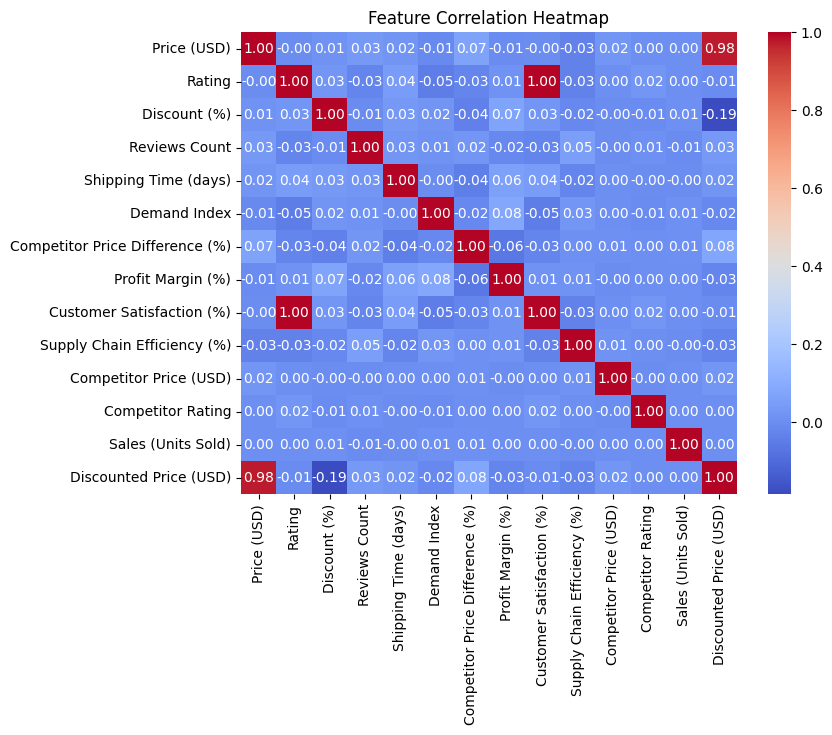

In [ ]:
# Correlation heatmap
# Correlation heatmap
plt.figure(figsize=(8,6))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X_demand = df[['Price (USD)', 'Discounted Price (USD)']]  # Adjust based on dataset columns
y_demand = df['Demand Index']
X_train, X_test, y_train, y_test = train_test_split(X_demand, y_demand, test_size=0.2, random_state=42)

model_demand = LinearRegression()
model_demand.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Demand Analysis (Total Sales by Product(category))

# Calculate total sales per product
total_sales = df.groupby("Category")["Discounted Price (USD)"].sum().reset_index()
total_sales.rename(columns={"Discounted Price (USD)": "Total_Sales"}, inplace=True)

# Display top products by sales
print(total_sales.sort_values(by="Total_Sales", ascending=False).head(10))


         Category   Total_Sales
3  Home & Kitchen  8.983897e+06
0          Beauty  8.324499e+06
2      Headphones  6.849247e+06
1        Footwear  6.280346e+06
4  Home Appliance  6.023732e+06
6      Smartphone  5.761484e+06
5          Laptop  5.560851e+06
7        Wearable  4.674670e+06


In [ ]:
#Total Sales per Product

total_sales = df.groupby("Product Name")["Discounted Price (USD)"].sum().reset_index()
total_sales.rename(columns={"Discounted Price (USD)": "Total_Sales"}, inplace=True)

# Print top 15 products by total sales
print("Total Sales per Product:")
print(total_sales.sort_values(by="Total_Sales", ascending=False).head(15))

Total Sales per Product:
                   Product Name   Total_Sales
23           Samsung Galaxy S23  3.419429e+06
12         Instant Pot Duo Plus  3.250914e+06
21                    Puma RS-X  2.618417e+06
1                   AirPods Pro  2.522742e+06
24              Sony WH-1000XM5  2.453695e+06
6   Dyson Supersonic Hair Dryer  2.383304e+06
4      Clinique Hydrating Serum  2.382594e+06
22      Samsung 65-inch QLED TV  2.285961e+06
2          Apple Watch Series 9  2.264579e+06
11              Instant Pot Duo  2.199242e+06
5                   Dell XPS 15  2.195252e+06
7              Dyson V11 Vacuum  2.193155e+06
18             Nike Air Max 270  2.049607e+06
3          Bose QuietComfort 45  1.872811e+06
15           Lenovo ThinkPad X1  1.833328e+06


In [ ]:
avg_prices = df.groupby('Category').agg({
    'Price (USD)': 'mean',
    'Competitor Price (USD)': 'mean'
}).reset_index()

In [ ]:
avg_prices_melted = avg_prices.melt(id_vars='Category',
                                    value_vars=['Price (USD)', 'Competitor Price (USD)'],
                                    var_name='Price Type', value_name='Average Price')


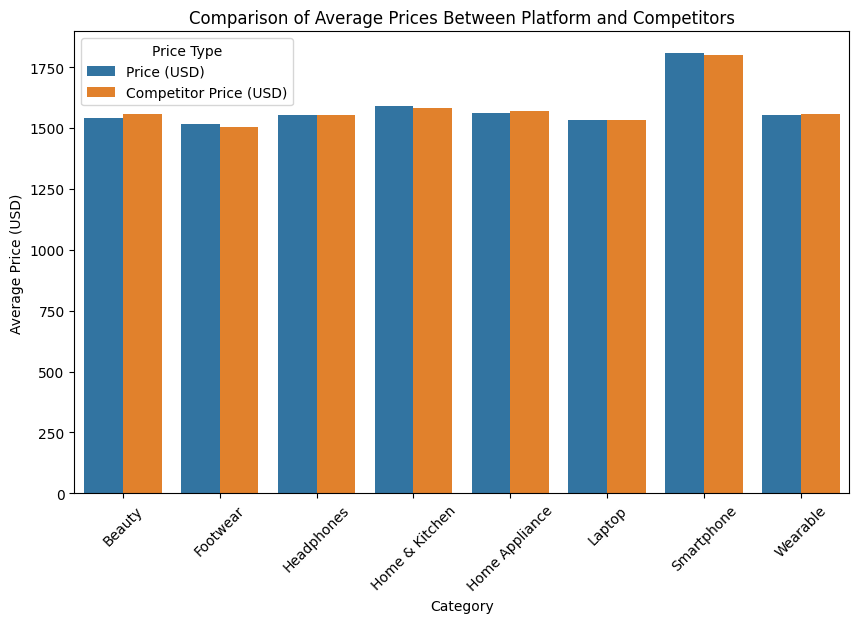

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Price', hue='Price Type', data=avg_prices_melted)
plt.title('Comparison of Average Prices Between Platform and Competitors')
plt.xticks(rotation=45)
plt.ylabel('Average Price (USD)')
plt.show()

In [ ]:
# Group by product and calculate total sales
total_sales = df.groupby('Product Name')['Sales (Units Sold)'].sum().reset_index()
total_sales.rename(columns={'Sales (Units Sold)': 'Total Sales'}, inplace=True)


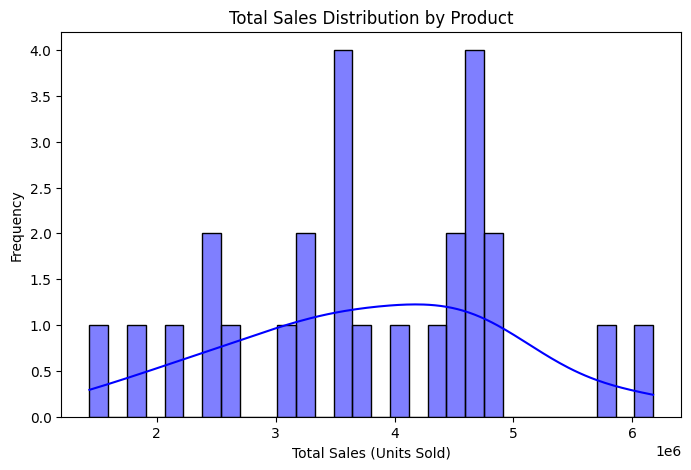

In [ ]:
# Plot total sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(total_sales['Total Sales'], bins=30, kde=True, color='blue')
plt.title('Total Sales Distribution by Product')
plt.xlabel('Total Sales (Units Sold)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
features = df[['Price (USD)', 'Discount (%)', 'Competitor Price (USD)', 'Sales (Units Sold)']]
target = df['Discounted Price (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate and print model accuracy
errors = abs(y_pred - y_test)
accuracy = 100 - (100 * (errors.sum() / y_test.sum()))

print(f"Linear Regression Model Accuracy: {accuracy:.2f}%")




Linear Regression Model Accuracy: 95.97%


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Categorical columns to encode
categorical_columns = ['Category', 'Brand', 'Stock Availability', 'Return Policy', 'Competitor Name', 'Competitor Stock Availability']

# Apply LabelEncoder to each column
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# Show the transformed dataframe
print(df.head())

      Product Name  Category  Price (USD)  Rating  Stock Availability  \
0  Sony WH-1000XM5         2       112.85     3.7                   0   
1  Sony WH-1000XM5         2       112.85     3.7                   0   
2  Sony WH-1000XM5         2       112.85     3.7                   0   
3  Sony WH-1000XM5         2       112.85     3.7                   0   
4  Sony WH-1000XM5         2       112.85     3.7                   0   

   Discount (%)  Brand  Reviews Count  Shipping Time (days)  Return Policy  \
0            12      0           2745                     8              2   
1            12      0           2745                     8              2   
2            12      0           2745                     8              2   
3            12      0           2745                     8              2   
4            12      0           2745                     8              2   

   ...  Competitor Price Difference (%) Profit Margin (%)  \
0  ...                         

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selecting relevant features for demand prediction
features = ['Price (USD)', 'Discount (%)', 'Rating', 'Reviews Count',
            'Shipping Time (days)', 'Competitor Price Difference (%)',
            'Profit Margin (%)', 'Customer Satisfaction (%)',
            'Supply Chain Efficiency (%)']
target = 'Sales (Units Sold)'

# Preparing the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)


(1253.7417053631323, 1459.7593031839308, -0.03560457435896902)

<ipython-input-31-6b3171427fb4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


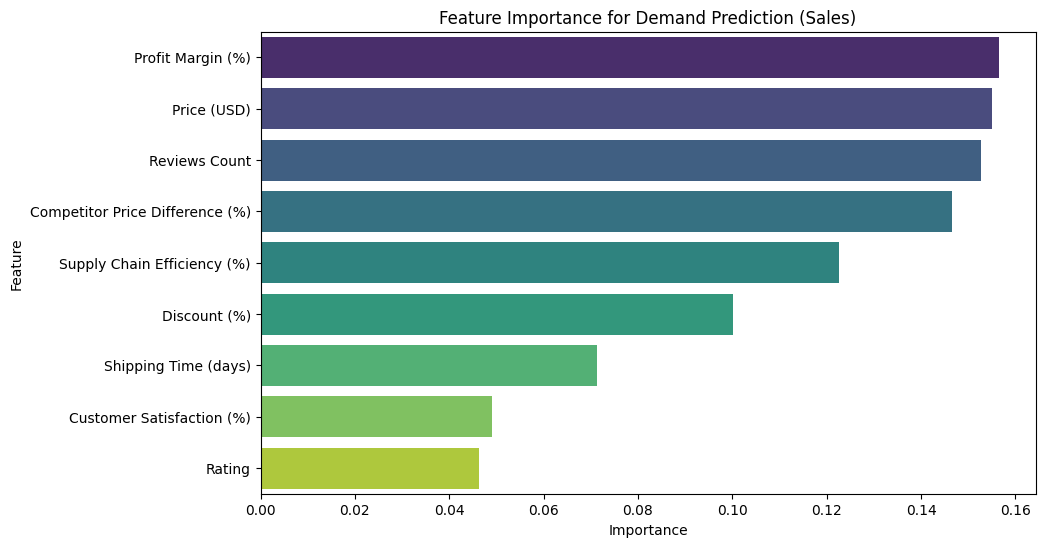

In [ ]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Demand Prediction (Sales)')
plt.show()

In [ ]:
import http.client

conn = http.client.HTTPSConnection("walmart-data.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "2ab6aa1c26msh99cbdca2111eb1ap13df56jsn89409570906f",
    'x-rapidapi-host': "walmart-data.p.rapidapi.com"
}

conn.request("GET", "/walmart-serp.php?url=https%3A%2F%2Fwww.walmart.com%2Fsearch%3Fq%3Dsamsung%2Bgalaxy", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"original_status":200,"pc_status":200,"url":"https://www.walmart.com/search?q=samsung galaxy","body":{"products":[{"position":1,"title":"Samsung Galaxy Watch4 40mm Smart Watch, Bluetooth, Pink Gold","image":"https://i5.walmartimages.com/seo/SAMSUNG-Galaxy-Watch-4-40mm-BT-Pink-Gold-SM-R860NZDAXAA-Not-USA-Version_9cee3bd0-a997-4f63-8212-f6e3d5925655.37f3fee3e43bee2f2e9ed647dd87ee36.png?odnHeight=580\u0026odnWidth=580\u0026odnBg=FFFFFF","link":"https://www.walmart.com/sp/track?bt=1\u0026eventST=click\u0026plmt=sp-search-middle~desktop~\u0026pos=1\u0026tax=1105910_1073085_7617805\u0026rdf=1\u0026rd=https%3A%2F%2Fwww.walmart.com%2Fip%2FSAMSUNG-Galaxy-Watch-4-40mm-BT-Pink-Gold-SM-R860NZDAXAA-Not-USA-Version%2F928187372%3FclassType%3DVARIANT%26adsRedirect%3Dtrue\u0026adUid=24709527-5fbf-4373-ad19-c9c4dc6eb313\u0026mloc=sp-search-middle\u0026pltfm=desktop\u0026pgId=samsung%20galaxy\u0026pt=search\u0026spQs=JRzzMi2I-UwoD2nswIuBPAtF09YHRhiVQDQ1UOl5sO3poCMjsRynDE3iwPyBgCzsb5RhYcoogMkaJDAL9JTKxLN